In [48]:
%matplotlib inline
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
import numpy as np
from textblob import TextBlob
import csv

from wordcloud import WordCloud,ImageColorGenerator
#from scipy.misc import imread
import string

In [49]:
cnn = pd.read_json('https://newsapi.org/v1/articles?source=cnn&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
wsp=pd.read_json('https://newsapi.org/v1/articles?source=the-washington-post&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
bbc=pd.read_json("https://newsapi.org/v1/articles?source=bbc-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
abc=pd.read_json("https://newsapi.org/v1/articles?source=abc-news-au&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
#google = pd.read_json(" https://newsapi.org/v1/articles?source=google-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
ft = pd.read_json("https://newsapi.org/v1/articles?source=financial-times&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
bloomberg = pd.read_json("https://newsapi.org/v1/articles?source=bloomberg&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
wsj = pd.read_json("https://newsapi.org/v1/articles?source=the-wall-street-journal&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")

In [ ]:
total = [wsj, cnn, wsp, bbc, abc, ft, bloomberg]
total1 = pd.concat(total, ignore_index=True)
total1

In [51]:
k = 0
while k < len(total1):
    if total1['articles'][k]['description'] is None:
        total1['articles'][k]['description'] = 'None'
    k += 1

j = 0
while j < len(total1):
    print(type(total1['articles'][j]['description']))
    j += 1


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [52]:
l = 0
while l < len(total1):
    if total1['articles'][l]['title'] is None:
        total1['articles'][l]['title'] = 'None'
    l += 1

p = 0
while p < len(total1):
    print(type(total1['articles'][p]['title']))
    p += 1

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [53]:
# write the news posts into a new .csv file
n_rows = len(total1.index)
articles = total1['articles']
result = csv.writer(open('result.csv','a'))
result.writerow(['PublishedAt','Title','description'])
for i in range(0,n_rows):
    line = [articles[i]['publishedAt'],articles[i]['title'],articles[i]['description']]
    result.writerow(line)

# print the first item in the 'articles' series as an example.
articles[0]

{'author': 'James Marson',
 'title': 'Ukrainian Counteroffensive Pierces Main Russian Defensive Line in Southeast',
 'description': 'After three months of grinding advances in Western-backed operation, Kyiv accelerates advances along main line of attack',
 'url': 'https://www.wsj.com/world/europe/ukrainian-counteroffensive-pierces-main-russian-defensive-line-in-southeast-9441e204?mod=hp_lead_pos1',
 'urlToImage': 'https://images.wsj.net/im-845027/social',
 'publishedAt': '2023-08-31T11:25:00Z'}

In [54]:
# type of each entry in the 'articles' column is 'dict'
type(articles[0])

dict

In [55]:
# keys of the 'dict' variables are 'author', 'publishedAt', 'urlToImage', 'description', 'title', 'url'
articles[0].keys()


dict_keys(['author', 'title', 'description', 'url', 'urlToImage', 'publishedAt'])

In [56]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [57]:
blob = TextBlob(str(articles[0]['title']))
blob.tags

[('Ukrainian', 'JJ'),
 ('Counteroffensive', 'NNP'),
 ('Pierces', 'NNPS'),
 ('Main', 'NNP'),
 ('Russian', 'NNP'),
 ('Defensive', 'NNP'),
 ('Line', 'NNP'),
 ('in', 'IN'),
 ('Southeast', 'NNP')]

In [58]:
i = 0
while i < n_rows:
    blob = TextBlob(articles[i]['title'])
    print(1 + i, ". ", blob, sep = "")
    i += 1

1. Ukrainian Counteroffensive Pierces Main Russian Defensive Line in Southeast
2. Proud Boys Leader Joseph Biggs Sentenced to 17 Years in Prison
3. Clarence Thomas Fires Back at Allegations of Ethical Breaches
4. Summer Spending Surge Shows Consumers Driving Economic Growth
5. China’s Economy Shows Fresh Weakness in Factories, Housing and Consumer Spending
6. Southeast Starts Cleanup After Idalia Lashes Region
7. The Real Story of Elon Musk’s Twitter Takeover
8. EV Boom Remakes Rural Towns in the American South
9. Five Things to Know Before Driving an EV
10. Donald Trump Pleads Not Guilty in Georgia Elections Case
11. No charges will be filed in the shooting death of a South Carolina college student who tried to get into the wrong house, officials say
12. Video: This is what struck Dr. Sanjay Gupta about Mitch McConnell appearing to freeze at news conference | CNN
13. Convicted murderer escapes prison outside Philadelphia
14. Video: Giuliani will likely face these consequences upon los

In [19]:
j = 0
while j < n_rows:
    blob1 = TextBlob(str(articles[j]['description']))
    print(1 + j, ". ", blob1, sep = "")
    j += 1

1. After three months of grinding advances in Western-backed operation, Kyiv accelerates advances along main line of attack
2. Supreme Court justice’s lawyer says critics ‘motivated by hatred’ after release of disclosure form listing three 2022 trips paid for by billionaire Harlan Crow
3. Fed likely to leave rates unchanged in September as price pressures ease
4. The latest data heap further pressure on policy makers to revive country’s crumbling growth
5. Storm has moved quickly but weakened since hitting Florida as a hurricane a day earlier
6. Former president waives his right to formal court appearance next week
7. In an exclusive excerpt from his new biography ‘Elon Musk,’ Walter Isaacson offers a behind-the-scenes look at one of the most surprising and controversial decisions of the mogul’s career.
8. A town of 400 people scrambles to prepare for 6,000 auto workers as a giant Ford plant rises
9. One-pedal driving. Zero engine noises. And goodbye, door handles. Driving an electric 

In [22]:
#write the csv file into a txt file called result_text.txt
contents = csv.reader(open('result.csv','r'))
texts = open('result_text.txt','w')
list_of_text = []
for row in contents:
    line = row[2].encode('utf-8')
    line = str(line.decode())
    list_of_text.append(line)
texts.writelines(list_of_text)

In [23]:
text=open("result_text.txt",'r')
text=text.read()
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

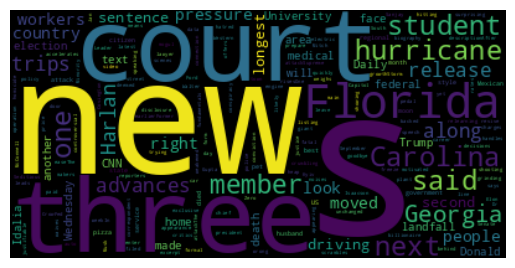

In [24]:
#display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

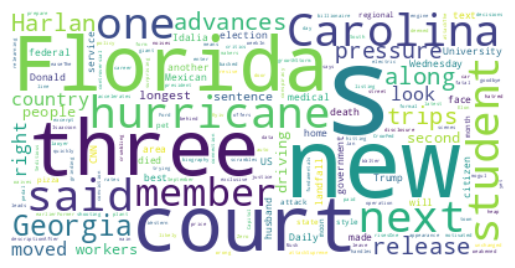

In [25]:
# increase max_font_size and change backgroud color to white
wordcloud = WordCloud(max_font_size=40).generate(text)
wordcloud = WordCloud(max_words=200,background_color='white',max_font_size=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
# a loop to show sentiment analysis results of the 100 titles
n = 0
while n < n_rows:
    print(TextBlob(articles[n]['title']).sentiment)
    n += 1

Sentiment(polarity=0.08333333333333333, subjectivity=0.16666666666666666)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.3, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=-0.25, subjectivity=0.4)
Sentiment(polarity=-0.4333333333333333, subjectivity=0.6)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subje

In [27]:
N = 0
tests_title = []

while N < n_rows:
    tests_title.append(TextBlob(articles[N]['title']).sentiment)
    N += 1

In [28]:
list_polarity_title = [] # this list contains all titles polarity scores.

for test in tests_title:
    list_polarity_title.append(test.polarity)

In [29]:
list_subjectivity_title = [] # this list contains all titles subjectivity scores.

for test in tests_title:
    list_subjectivity_title.append(test.subjectivity)

In [30]:
m = 0
while m < n_rows:
    print(TextBlob(articles[m]['description']).sentiment)
    m += 1

Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=0.7)
Sentiment(polarity=0.16666666666666666, subjectivity=0.5)
Sentiment(polarity=0.09523809523809523, subjectivity=0.17857142857142858)
Sentiment(polarity=0.3972727272727273, subjectivity=0.48090909090909084)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.04999999999999999, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.3125)
Sentiment(polarity=-0.25, subjectivity=0.15)
Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)
Sentiment(polarity=-0.041666666666666664, subjectivity=0.041666666666666664)


In [31]:
M = 0
tests_description = []

while M < n_rows:
    tests_description.append(TextBlob(articles[M]['description']).sentiment)
    M += 1

In [32]:
list_polarity_description = [] # this list contains all descriptions' polarity scores.

for test in tests_description:
    list_polarity_description.append(test.polarity)

In [33]:
list_subjectivity_description = [] # this list contains all descriptions' subjectivity scores.

for test in tests_description:
    list_subjectivity_description.append(test.subjectivity)

In [34]:
total_score = [list_polarity_title, list_subjectivity_title, list_polarity_description, list_subjectivity_description]
labels = ['T_polarity', 'T_subjectivity', 'D_polarity', 'D_subjectivity']
df = pd.DataFrame.from_records(total_score, index = labels)
df

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
T_polarity,0.083333,0.1,0.000000,0.30,0.000000,0.250000,0.200000,0.0,0.0,0.8,...,0.0,0.0,0.0,0.0,0.0,-0.3125,0.0,-0.700000,0.0,0.10
T_subjectivity,0.166667,0.3,0.066667,0.50,0.000000,1.000000,0.300000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.4375,0.0,0.666667,0.0,0.35
D_polarity,0.166667,0.0,0.000000,0.25,0.166667,0.095238,0.397273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.00
D_subjectivity,0.333333,0.0,1.000000,0.70,0.500000,0.178571,0.480909,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.00


In [35]:
df = df.transpose()
df

,T_polarity,T_subjectivity,D_polarity,D_subjectivity
0,0.083333,0.166667,0.166667,0.333333
1,0.100000,0.300000,0.000000,0.000000
2,0.000000,0.066667,0.000000,1.000000
3,0.300000,0.500000,0.250000,0.700000
4,0.000000,0.000000,0.166667,0.500000
...,...,...,...,...
64,-0.312500,0.437500,0.000000,0.000000
65,0.000000,0.000000,0.000000,0.000000
66,-0.700000,0.666667,0.000000,0.000000
67,0.000000,0.000000,0.000000,0.000000


<Axes: >

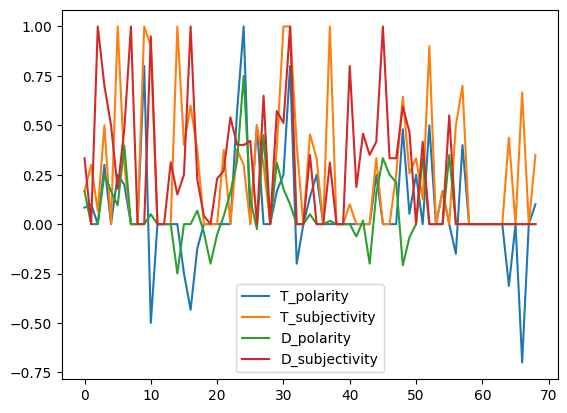

In [36]:
df.plot()

In [39]:
c_T_polarity = df['T_polarity']
new_T_polarity = []
B = 0
C = 0
while B < n_rows:
    sum = 0
    while C < B :
        sum += c_T_polarity[C]
        C += 1
    new_T_polarity.append(sum)
    B += 10
new_T_polarity
# The press are in

[0,
 1.7333333333333334,
 -1.3083333333333333,
 2.234848484848485,
 1.2363636363636363,
 0.7823809523809524,
 1.1666666666666665]

In [41]:
c_T_subjectivity = df['T_subjectivity']
new_T_subjectivity = []
D = 0
E = 0
while D < n_rows:
    sum = 0
    while E < D:
        sum += c_T_subjectivity[E]
        E += 1
    new_T_subjectivity.append(sum)
    D += 10
new_T_subjectivity

[0,
 3.333333333333333,
 3.275,
 2.2356060606060604,
 4.1878787878787875,
 1.5854761904761905,
 2.7250000000000005]

In [42]:
c_D_polarity = df['D_polarity']
new_D_polarity = []
F = 0
G = 0
while F < n_rows:
    sum = 0
    while G < F:
        sum += c_D_polarity[G]
        G += 1
    new_D_polarity.append(sum)
    F += 10
new_D_polarity

[0,
 1.0758441558441558,
 -0.37348484848484853,
 2.079107744107744,
 0.34523809523809523,
 0.4317045454545455,
 0.6833333333333333]

In [43]:
c_D_subjectivity = df['D_subjectivity']
new_D_subjectivity = []
H = 0
I = 0
while H < n_rows:
    sum = 0
    while I < H:
        sum += c_D_subjectivity[I]
        I += 1
    new_D_subjectivity.append(sum)
    H += 10
new_D_subjectivity

[0,
 4.1928138528138525,
 2.9314393939393932,
 3.4862542087542088,
 2.1730158730158733,
 4.939444444444445,
 0.9666666666666668]

In [44]:
total_score_bypublishhouse = [new_T_polarity, new_T_subjectivity, new_D_polarity, new_D_subjectivity]
df1 = pd.DataFrame.from_records(total_score_bypublishhouse, index = labels)
df1

,0,1,2,3,4,5,6
T_polarity,0,1.733333,-1.308333,2.234848,1.236364,0.782381,1.166667
T_subjectivity,0,3.333333,3.275000,2.235606,4.187879,1.585476,2.725000
D_polarity,0,1.075844,-0.373485,2.079108,0.345238,0.431705,0.683333
D_subjectivity,0,4.192814,2.931439,3.486254,2.173016,4.939444,0.966667


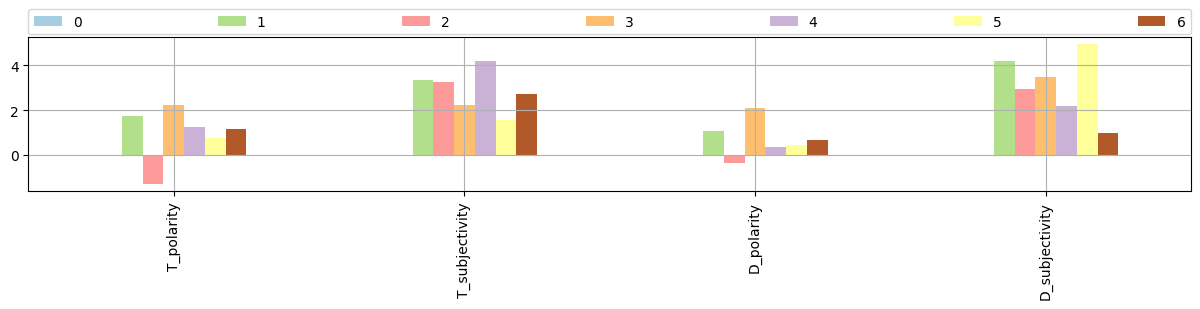

In [45]:
#colors = [(x/10.0, x/20.0, 0.75) for x in range(n_rows)]

df1.plot(kind = 'bar', legend = True, figsize = (15, 2), colormap='Paired', grid = True)

# place the legend above the subplot and use all the expended width.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=10, mode="expand", borderaxespad=0.)

<Axes: title={'center': 'Polarity for news titles by news press'}>

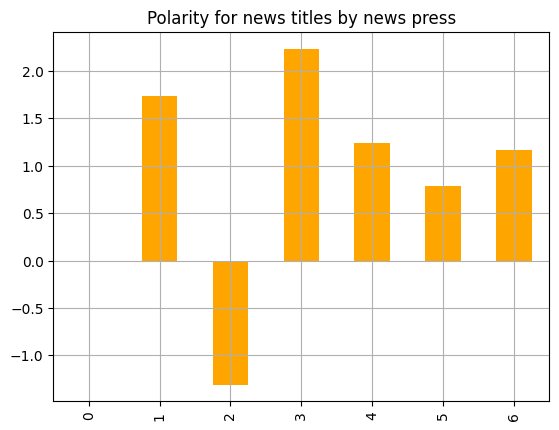

In [46]:
bar_color = 'orange'

row = df1.iloc[0]
row.plot(kind = 'bar', title = "Polarity for news titles by news press", color = bar_color, grid = True)